In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configurazione per i grafici
plt.style.use('default')
sns.set_palette('husl')

# Caricamento dataset
file_path = r'C:/Users/asmaa/OneDrive/Desktop/Analisi-SM/COLD 30.07.2025.xlsx'
df = pd.read_excel(file_path)

print('=== INFORMAZIONI GENERALI SUL DATASET ===')
print(f'Dimensioni del dataset: {df.shape}')
print(f'Numero di pazienti: {df.shape[0]}')
print(f'Numero di variabili: {df.shape[1]}')

df.info()
df.describe()

=== INFORMAZIONI GENERALI SUL DATASET ===
Dimensioni del dataset: (515, 32)
Numero di pazienti: 515
Numero di variabili: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 32 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype         
---  ------                                                                                                                                             --------------  -----         
 0   Identificativo                                                                                                                                     515 non-null    int64         
 1   FENO B                                                                                                                                             515 non-null    object        
 2   FENO A                            

,Identificativo,Diagnosi,Data questionario,Età,Il paziente ha avuto tosse persistente o ricorrente?,Il paziente è sensibilizzato ad allergeni inalatori?,Il paziente è o è stato fumatore?,Il paziente ha eseguito la spirometria?,Probabilità di COLD
count,515.000000,515.00000,515,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,0.84466,2024-05-28 02:22:36.116504832,1.147573,0.423301,0.600000,0.708738,0.866019,2.066019
min,1.000000,0.00000,2023-12-21 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.500000,0.00000,2024-03-11 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,258.000000,1.00000,2024-04-18 00:00:00,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,386.500000,1.00000,2024-09-06 00:00:00,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000
max,515.000000,3.00000,2025-02-05 00:00:00,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000
std,148.811962,0.62933,NaN,0.853904,0.494563,0.490374,0.897804,0.340963,1.303807


In [16]:
# Visualizzazione prime righe e struttura
display(df.head())
for i, col in enumerate(df.columns):
    print(f'{i+1:2d}. {col}')
print(df.dtypes.value_counts())

,Identificativo,FENO B,FENO A,FEV1 L,FEV1 %,IT,Eosinofili in numero assoluto,Eosinofili con spartiacque 150,Eosinofili con spartiacque 300,Eosinofili in 3 gruppi,...,Il paziente è o è stato fumatore?,Per quale motivo ha smesso di fumare?,Sigarette al giorno,Anni di fumo,Il paziente ha eseguito la spirometria?,Il paziente è risultato ostruito?,Persiste ostruzione dopo test di broncodilatazione?,Il paziente è stato sottoposto ad indagini radiologiche?,"La radiografia è suggestiva di patologie differenti da asma, bronchite, enfisema (es: versamenti, addensamenti parenchimali, scompenso cardiaco)?",Probabilità di COLD
0,1,A,A,1.22,58,86,A,A,A,A,...,0,N,N,N,1,0,2,0,N,2
1,2,A,A,4.57,116,85,A,A,A,A,...,1,N,20,45,1,0,2,1,0,0
2,3,25,10.31,2.04,67,49,1500,1,1,2,...,0,N,N,N,1,1,1,1,0,3
3,4,33,0,2.09,69,49.98,1100,1,1,2,...,0,N,N,N,1,1,2,1,0,0
4,5,70,28.18,3.35,92,70.29,A,A,A,A,...,0,N,N,N,1,1,0,0,N,2


 1. Identificativo
 2. FENO B
 3. FENO A
 4. FEV1 L
 5. FEV1 %
 6. IT
 7. Eosinofili in numero assoluto
 8. Eosinofili con spartiacque 150
 9. Eosinofili con spartiacque 300
10. Eosinofili in 3 gruppi
11. FENOB con spartiacque 25
12. GRUPPO
13. CLASSE
14. Diagnosi
15. Data questionario
16. Età
17. Il paziente ha avuto tosse persistente o ricorrente?
18. Quale tipo prevalente di tosse ha o ha avuto il paziente?
19. Il paziente ha o ha avuto la dispnea?
20. La dispnea è progressiva o ingravescente?
21. La dispnea è sotto sforzo, a riposo o accessionale?
22. Il paziente è sensibilizzato ad allergeni inalatori?
23. Il paziente è o è stato fumatore?
24. Per quale motivo ha smesso di fumare?
25. Sigarette al giorno
26. Anni di fumo
27. Il paziente ha eseguito la spirometria?
28. Il paziente è risultato ostruito?
29. Persiste ostruzione dopo test di broncodilatazione?
30. Il paziente è stato sottoposto ad indagini radiologiche?
31. La radiografia è suggestiva di patologie differenti da asma, 

In [17]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100


<Axes: ylabel='count'>

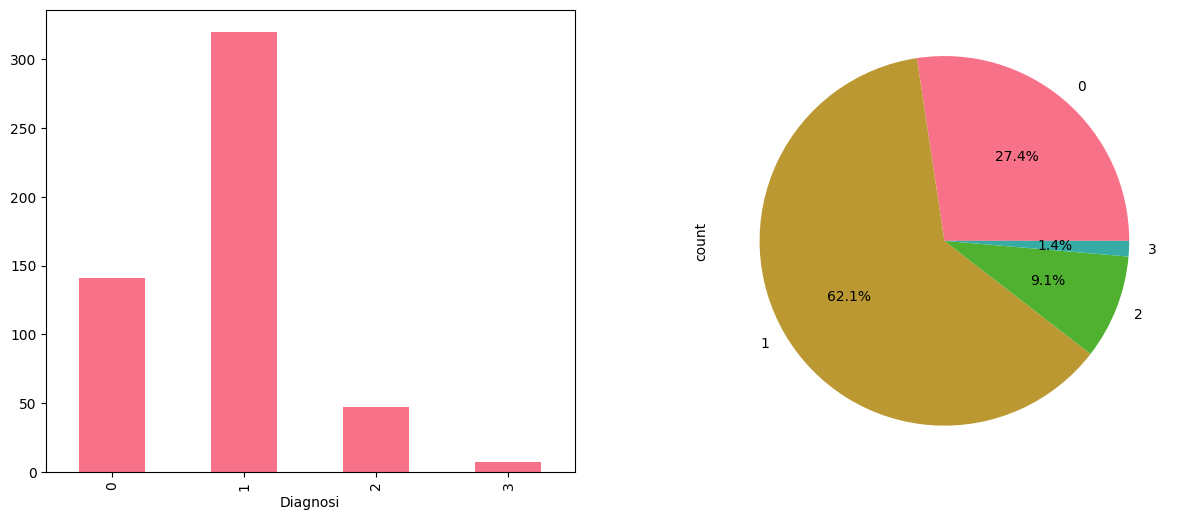

In [18]:
diagnosi_counts = df['Diagnosi'].value_counts().sort_index()
# Grafici a barre e torta per distribuzione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
diagnosi_counts.plot(kind='bar', ax=ax1)
diagnosi_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')

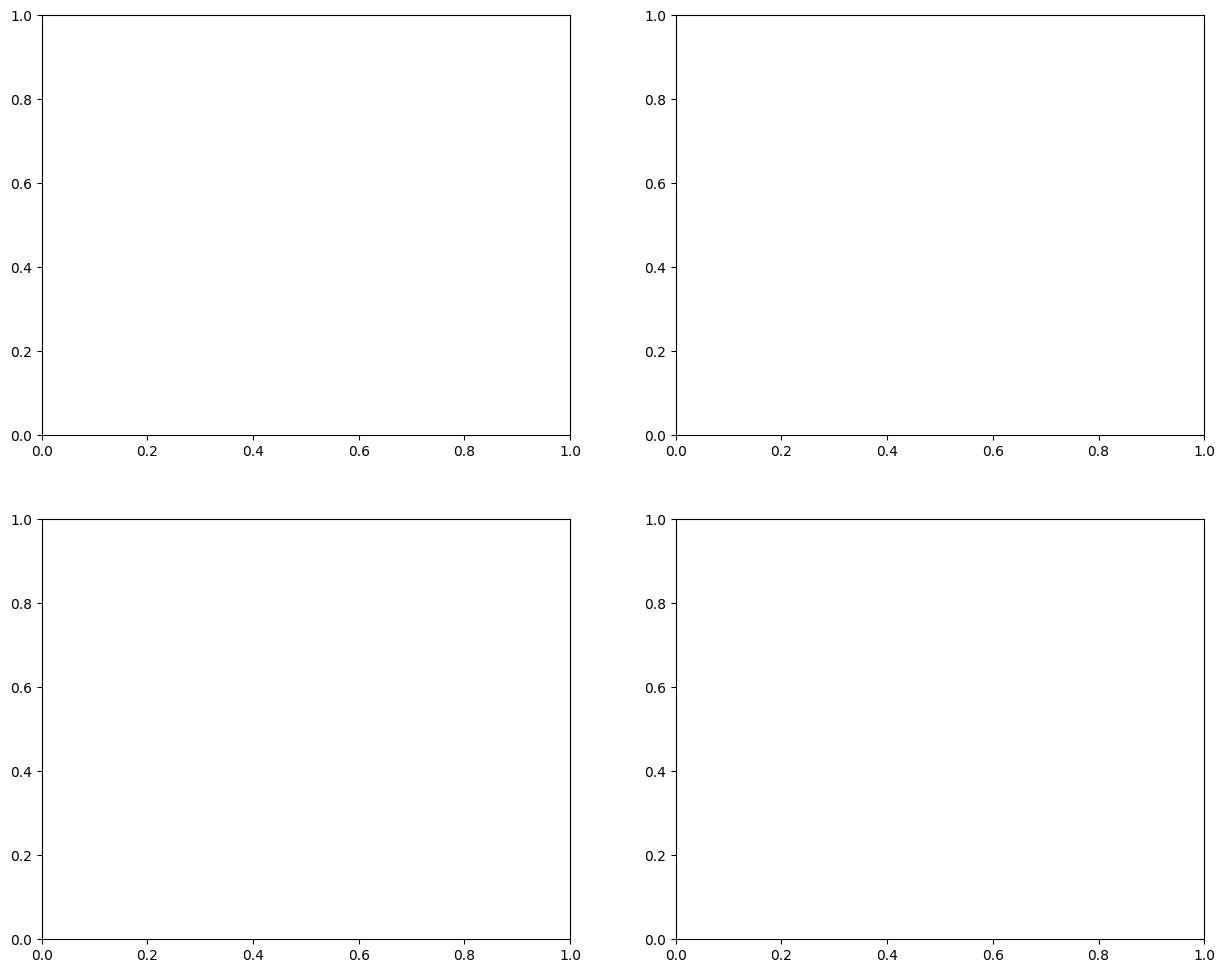

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
key_categorical = ['GRUPPO', 'CLASSE', 'FENO B', 'FENO A']
# Grafici per ogni variabile categorica
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

<Axes: >

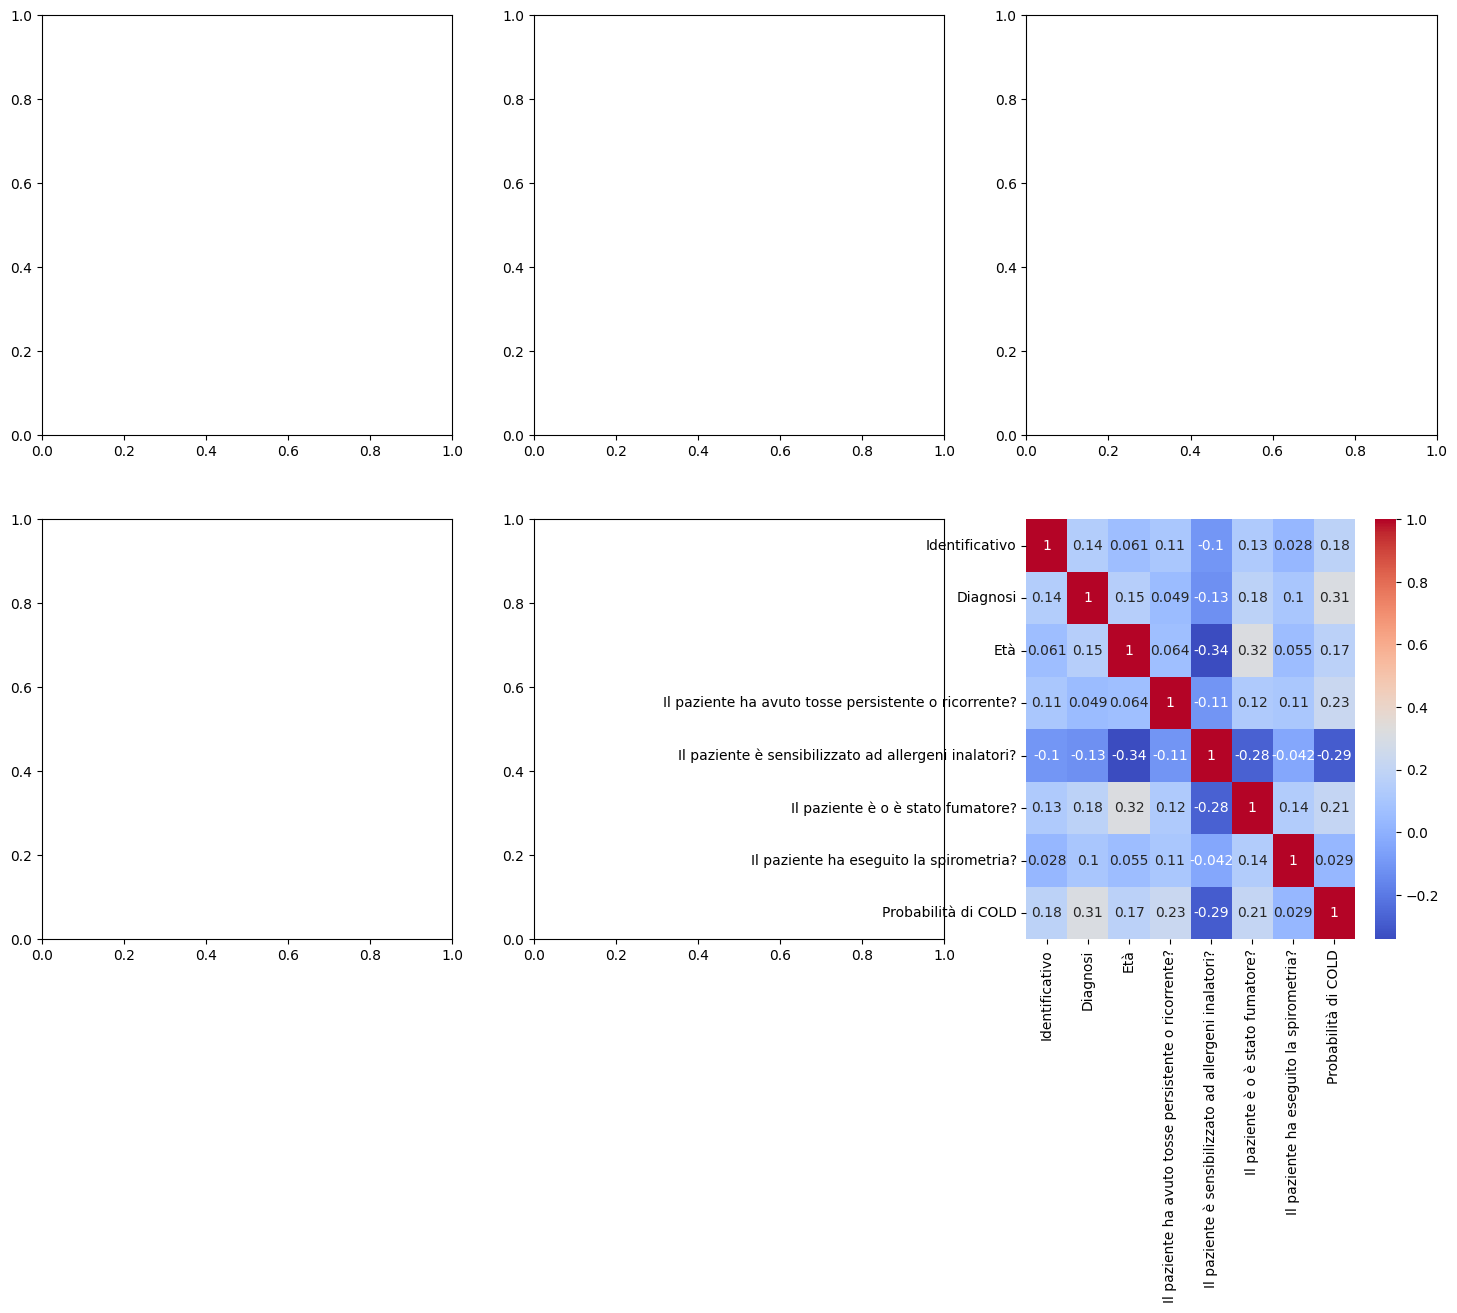

In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Istogrammi per distribuzione
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Matrice di correlazione
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [21]:
df_ml = df.copy()
# Rimozione colonne non necessarie
columns_to_drop = ['Identificativo', 'Data questionario']
df_ml = df_ml.drop(columns=[col for col in columns_to_drop if col in df_ml.columns])

# Encoding variabili categoriche
label_encoders = {}
categorical_columns = df_ml.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le

              precision    recall  f1-score   support

           0       0.56      0.36      0.43        28
           1       0.74      0.88      0.80        64
           2       1.00      0.89      0.94         9
           3       0.00      0.00      0.00         2

    accuracy                           0.72       103
   macro avg       0.57      0.53      0.54       103
weighted avg       0.70      0.72      0.70       103



<Axes: xlabel='importance', ylabel='feature'>

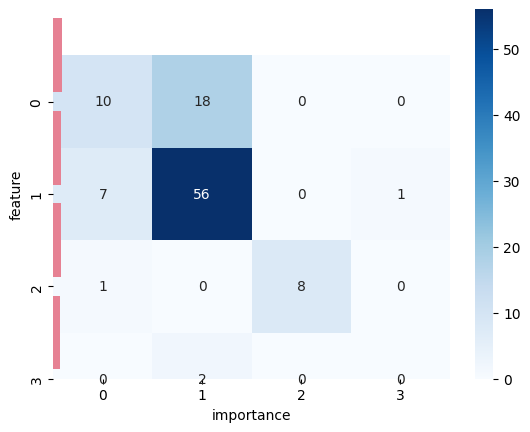

In [22]:
# Definizione target e features
target_column = 'Diagnosi'
X = df_ml.drop(columns=[target_column])
y = df_ml[target_column]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizzazione
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Metriche e visualizzazioni
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')